In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data=pd.read_csv('train.csv', index_col='PassengerId')
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(raw_data.shape)

(891, 11)


In [4]:
raw_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
data=raw_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']]

In [6]:
(data['Age'].isna()).value_counts()

False    714
True     177
Name: Age, dtype: int64

In [7]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

/home/lulu/.local/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
(data['Age'].isna()).value_counts()

False    891
Name: Age, dtype: int64

In [9]:
(data['Cabin'].isna()).value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [10]:
data['Deck']=data['Cabin'].str.get(0)
data['Deck'].value_counts()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [11]:
data.drop(['Cabin'], axis=1, inplace=True)
data.head()

/home/lulu/.local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,NaN
4,1,1,female,35.0,1,0,53.1000,C
5,0,3,male,35.0,0,0,8.0500,NaN


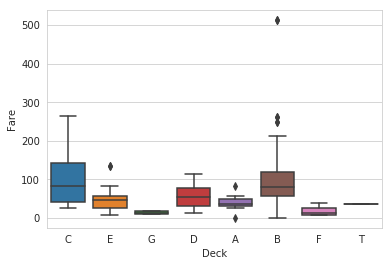

In [12]:
sns.set_style("whitegrid")
sns.boxplot('Deck', 'Fare', data=data)
plt.show()

In [13]:
deck_vs_fare = data[['Deck', 'Fare']]
deck_vs_fare.groupby(['Deck']).describe()

Fare                                                                 \
     count        mean         std      min      25%       50%        75%   
Deck                                                                        
A     15.0   39.623887   17.975333   0.0000  30.8479  35.50000   50.24790   
B     47.0  113.505764  109.301500   0.0000  57.0000  80.00000  120.00000   
C     59.0  100.151341   70.225588  26.5500  42.5021  83.47500  143.59165   
D     33.0   57.244576   29.592832  12.8750  30.0000  53.10000   77.28750   
E     32.0   46.026694   32.608315   8.0500  26.1125  45.18125   56.15730   
F     13.0   18.696792   11.728217   7.6500   7.7500  13.00000   26.00000   
G      4.0   13.581250    3.601222  10.4625  10.4625  13.58125   16.70000   
T      1.0   35.500000         NaN  35.5000  35.5000  35.50000   35.50000   

                
           max  
Deck            
A      81.8583  
B     512.3292  
C     263.0000  
D     113.2750  
E     134.5000  
F      39.0000  
G      16.7000  
T      35.5000

In [14]:
data.drop(['Deck'], axis=1, inplace=True)
dic_sex={'male':0, 'female':1}
data['int_sex'] = [dic_sex[x] for x in data['Sex']]
data.head()

/home/lulu/.local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,int_sex
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,0
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,1
4,1,1,female,35.0,1,0,53.1000,1
5,0,3,male,35.0,0,0,8.0500,0


In [15]:
target=data['Survived']
target.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
data.drop(['Sex'], axis=1, inplace=True)
data.corrwith(target)

/home/lulu/.local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Survived    1.000000
Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
int_sex     0.543351
dtype: float64

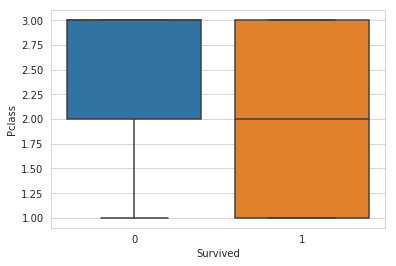

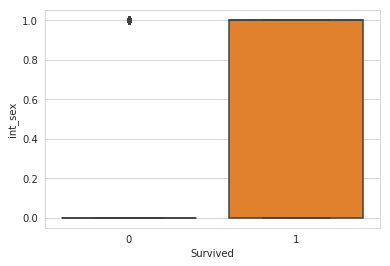

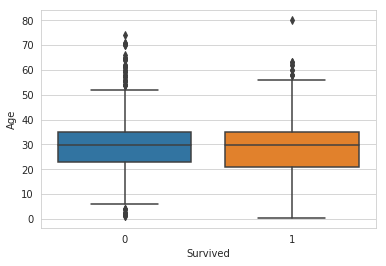

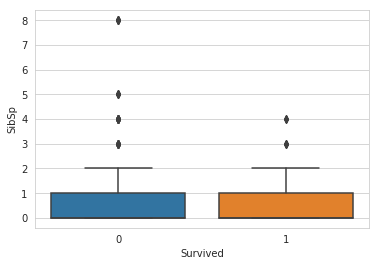

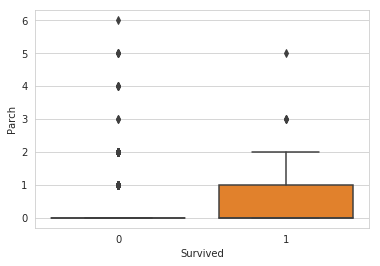

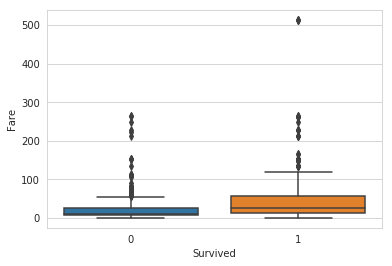

In [17]:
def plot_box(data, cols, target = target):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(target,col, data=data)
        plt.show()
cols=['Pclass','int_sex','Age','SibSp','Parch', 'Fare']
plot_box(data, cols)

In [18]:
data.drop(['Age', 'SibSp'], axis=1, inplace=True)
data.dtypes

/home/lulu/.local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Survived      int64
Pclass        int64
Parch         int64
Fare        float64
int_sex       int64
dtype: object

In [37]:
import sklearn.model_selection as ms
labels=np.array(data['Survived'])
features=np.array(data[['Pclass','Parch','Fare','int_sex']])

np.random.seed(9988)
indx=range(data.shape[0])
indx=ms.train_test_split(indx, test_size=0.3)
X_train=features[indx[0],:]
Y_train=np.ravel(labels[indx[0]])
X_test=features[indx[1],:]
Y_test=np.ravel(labels[indx[1]])

In [41]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:2,]

array([[-0.4025463 ,  0.71106851, -0.11781878,  1.32999582],
       [-0.4025463 , -0.47658747, -0.08279988, -0.75188206]])